In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_csv('../../dataset/BankChurners.csv')
bank_data = bank_data[bank_data.columns[:-2]]
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# transform object values to numeric values
bank_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
bank_data['Gender'].replace({'M':1, 'F':0}, inplace=True)
bank_data['Education_Level'].replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 
                                                                        'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}, inplace=True)
bank_data['Marital_Status'].replace({'Unknown':0, 'Divorced':1, 'Married':2, 'Single':3}, inplace=True)
bank_data['Income_Category'].replace({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3,
                                                                       '$80K - $120K':4, '$120K +':5}, inplace=True)
bank_data['Card_Category'].replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}, inplace=True)

bank_data.head()
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
# drop feature: Gender, Marital_Status, Card_Category,
X = bank_data.drop(columns=['Attrition_Flag', 'Gender', 'Marital_Status', 'Card_Category'], axis=1)
y = bank_data['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=bank_data['Attrition_Flag'])

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print('AUC Score after drop some columns:', roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)    
'''
before optimizing, AUC Score: 0.8896950426362192
after optimizing, AUC Score:  0.8999936406995231
'''

AUC Score after drop some columns: 0.8999936406995231
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2125
           1       0.93      0.81      0.87       407

    accuracy                           0.96      2532
   macro avg       0.95      0.90      0.92      2532
weighted avg       0.96      0.96      0.96      2532



'\nbefore optimizing, AUC Score: 0.8896950426362192\nafter optimizing, AUC Score:  0.8980592571180807\n'

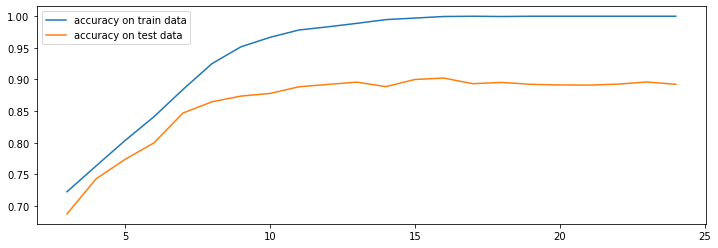

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# retrain decision tree, exploring whether the max_depth has influence on model
x_depth, test_depth, train_depth = [], [], []
for i in range(3, 25):
    rfc_depth = RandomForestClassifier(max_depth=i)
    rfc_depth.fit(X_train, y_train)
    
    train_depth += [roc_auc_score(y_train, rfc_depth.predict(X_train))]
    test_depth += [roc_auc_score(y_test, rfc_depth.predict(X_test))]
    x_depth += [i]

plt.figure(figsize=(12, 4))
plt.plot(x_depth, train_depth, label='accuracy on train data')
plt.plot(x_depth, test_depth, label='accuracy on test data')
plt.legend()    # max_depth is around 11-13. It won't make results much worse, but the model will be working faster

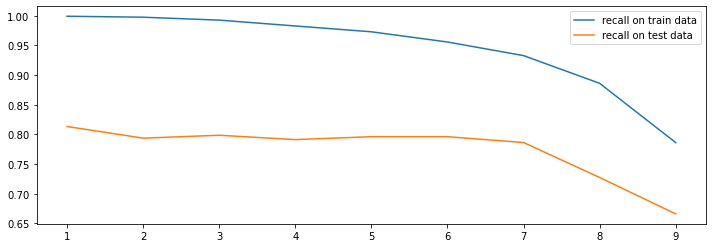

In [28]:
# retrain decision tree, exploring whether the max_depth has influence on model
# y=1, class_weight=i, y=0, class_weight=10-i
x_weight, test_weight, train_weight = [], [], []
for i in range(1, 10):
    rfc_weight = RandomForestClassifier(max_depth=12, class_weight={0:i, 1:10-i})
    rfc_weight.fit(X_train, y_train)
    
    train_weight += [recall_score(y_train, rfc_weight.predict(X_train))]
    test_weight += [recall_score(y_test, rfc_weight.predict(X_test))]
    x_weight += [i]

plt.figure(figsize=(12, 4))
plt.plot(x_weight, train_weight, label='recall on train data')
plt.plot(x_weight, test_weight, label='recall on test data')
plt.legend()

Our top priority in this business problem is to identify customers who are getting churned. Even if we predict non-churning customers as churned (FP), it won't harm our business. **But predicting churning customers as Non-churning will do. So recall (TP/TP + FN) need to be higher.**

So basicly, we sholdn't care about accuracy, but we should care about recall. That's why changing class_weight will be the right decision. so the weight is 2.

In [25]:
rfm_final = RandomForestClassifier(max_depth=5, class_weight={0:1, 1:9})
rfm_final.fit(X_train, y_train)
y_pred_final = rfm_final.predict(X_test)

print('accuracy score: ', accuracy_score(y_test, y_pred_final))
print('accuracy score1: ', roc_auc_score(y_test, y_pred_final))
print('recall score: ', recall_score(y_test, y_pred_final))

accuracy score:  0.8649289099526066
accuracy score1:  0.8956924411042056
recall score:  0.941031941031941


精确率accuracy score高，召回率recall score就会低，精确率和召回率是相互影响的，理想情况下两者都高，但是一般情况下准确率高，召回率就低；召回率高，准确率就低

此处将采用F1 score来衡量 

$$ F1 = \frac{2 * P * R}{P + R} $$